In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
plt.rcParams["figure.figsize"] = 10, 7
plt.rcParams["font.size"] = 25

np.random.seed(123454321)

# CLT

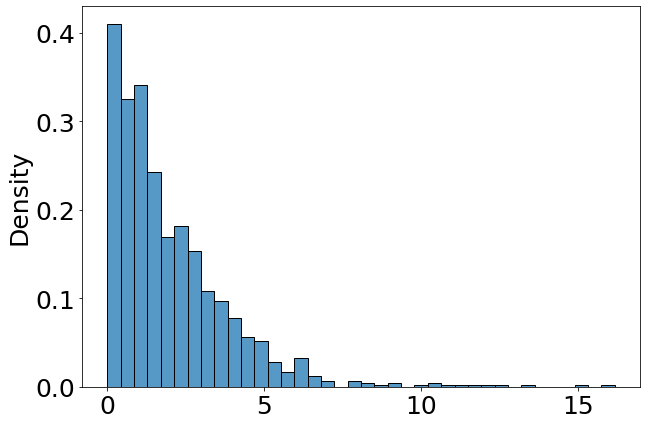

In [20]:
sample_size = 1000
sample = np.random.chisquare(2, size=(sample_size, ))

sns.histplot(sample, stat="density");

In [21]:
num_samples = 20
sample_means = []

for i in range(num_samples):
    sample = np.random.chisquare(2, size=(sample_size, ))
    sample_means.append(sample.mean())

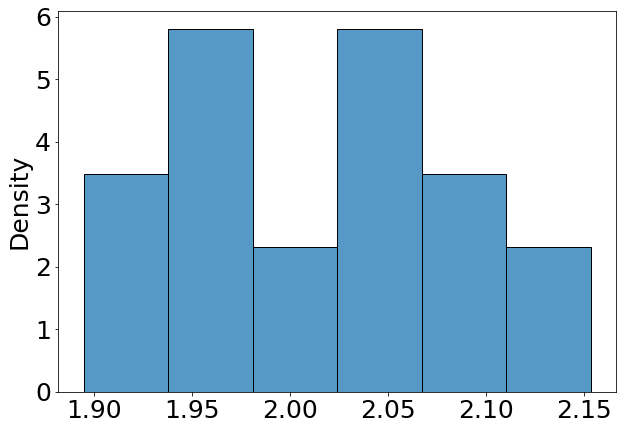

In [23]:
sns.histplot(sample_means, stat="density");

In [34]:
num_samples = 1000
sample_means = []

for i in range(num_samples):
    sample = np.random.chisquare(2, size=(sample_size, ))
    sample_means.append(sample.mean())

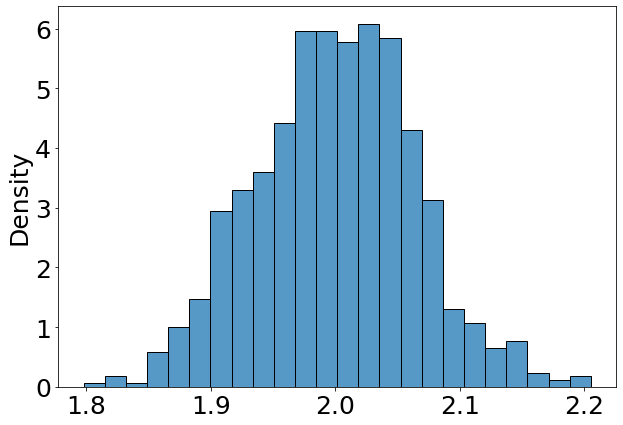

In [35]:
sns.histplot(sample_means, stat="density");

In [36]:
np.mean(sample_means)

2.0000737773054835

In [45]:
num_samples = 10000
sample_means = []

for i in range(num_samples):
    sample = np.random.chisquare(2, size=(sample_size, ))
    sample_means.append(sample.mean())

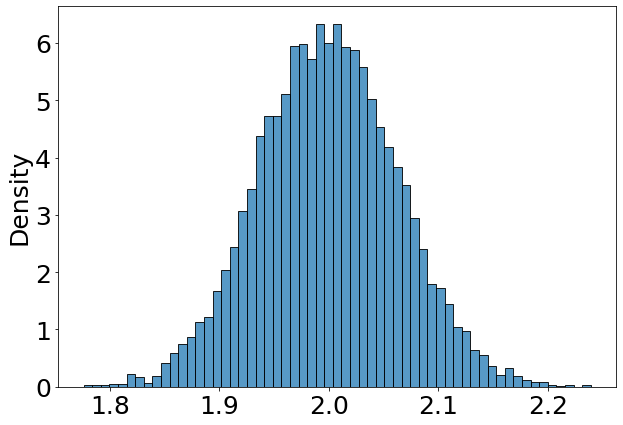

In [46]:
sns.histplot(sample_means, stat="density");

# SEM

In [48]:
np.std(sample_means)

0.06344975634801923

In [53]:
sigma_sample = np.std(sample)
sigma_sample / np.sqrt(sample_size)

0.06409937828250525

# CI

In [54]:
population = np.random.normal(180, 20, size=100000)

In [56]:
mu = population.mean()
sigma = population.std()

mu, sigma

(180.03318635366264, 19.989646839525744)

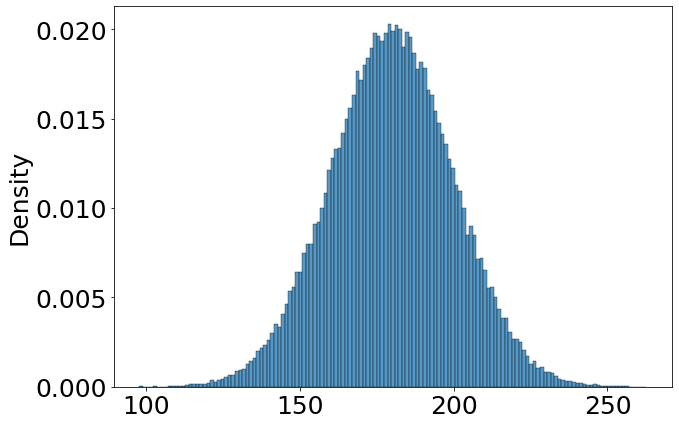

In [57]:
sns.histplot(population, stat="density");

In [58]:
means_1 = []
sample_size = 100
num_samples = 1000

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    mean = sample.mean()
    means_1.append(mean)
    
means_1 = np.array(means_1)

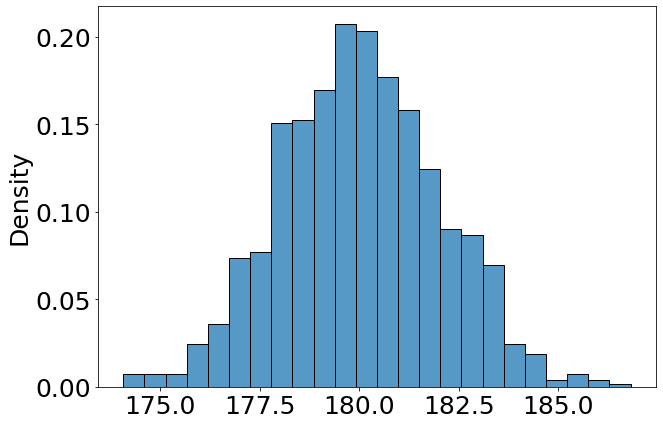

In [59]:
sns.histplot(means_1, stat="density");

In [60]:
se = sigma / np.sqrt(sample_size)
se

1.9989646839525743

In [62]:
# 95% ci
mean_mean = np.mean(means_1)
left_b = mean_mean - 1.96 * se
right_b = mean_mean + 1.96 * se

left_b, right_b

(176.11059186259246, 183.94653342368656)

In [63]:
means_1 = []
sample_size = 10000
num_samples = 1000

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    mean = sample.mean()
    means_1.append(mean)
    
means_1 = np.array(means_1)

In [64]:
se = sigma / np.sqrt(sample_size)
se

0.19989646839525743

In [65]:
# 95% ci
mean_mean = np.mean(means_1)
left_b = mean_mean - 1.96 * se
right_b = mean_mean + 1.96 * se

left_b, right_b

(179.6291078357544, 180.41270199186383)

# Сделаем все честно

In [66]:
# Знаем сигму
sample_size = 100
sample = np.random.choice(population, size=sample_size)
mean = sample.mean()

se = sigma / np.sqrt(sample_size)
left_b = mean - 1.96 * se
right_b = mean + 1.96 * se

left_b, right_b

(174.79435458502724, 182.63029614612134)

In [68]:
# Не знаем сигму
std = sample.std()
se = std / np.sqrt(sample_size)
left_b = mean - 1.96 * se
right_b = mean + 1.96 * se

left_b, right_b

(174.66438555986466, 182.76026517128392)

# Что значит 95% ДИ?

In [70]:
def calculate_ci(sample, sigma=None):
    if sigma is None:
        sigma = np.std(sample)
        
    mean = sample.mean()
    se = sigma / np.sqrt(len(sample))
    left_b = mean - 1.96 * se
    right_b = mean + 1.96 * se
    
    return left_b, right_b

In [103]:
# Знаем сигму
sample_size = 10
outcomes = []
num_samples = 1000

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    left_b, right_b = calculate_ci(sample, sigma=sigma)
    
    outcome = (left_b < mu) & (mu < right_b)
    outcomes.append(outcome)

In [104]:
np.mean(outcomes)

0.95

In [107]:
# Не знаем сигму
sample_size = 10
outcomes = []
num_samples = 1000

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    left_b, right_b = calculate_ci(sample)
    
    outcome = (left_b < mu) & (mu < right_b)
    outcomes.append(outcome)

In [108]:
np.mean(outcomes)

0.899

In [109]:
def calculate_ci(sample, sigma=None):
    if sigma is None:
        sigma = np.std(sample)
        
    mean = sample.mean()
    se = sigma / np.sqrt(len(sample))
    left_b = mean - 2.353 * se
    right_b = mean + 2.353 * se
    
    return left_b, right_b

In [116]:
# Не знаем сигму
sample_size = 10
outcomes = []
num_samples = 1000

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    left_b, right_b = calculate_ci(sample)
    
    outcome = (left_b < mu) & (mu < right_b)
    outcomes.append(outcome)

In [117]:
np.mean(outcomes)

0.95